In [124]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import numpy as np

In [1]:
import osmnx as ox

In [95]:
def get_cycleways_place(city_name): 
    
    # Configuring osmnx
    useful_tags = ox.settings.useful_tags_way + ['cycleway']
    ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
    
    # Querying for roads and bike trails
    cycleways = ox.graph_from_place(city_name, network_type='bike', simplify=False)
    
    # Finding all non-cycleways in the network
    non_cycleways = [(u, v, k) for  u, v, k, d  in  cycleways.edges(keys=True, data=True) if  not ('cycleway'  in  d  or  d['highway']=='cycleway')]
   
    # Remove non-cycleways and isolated nodes
    cycleways.remove_edges_from(non_cycleways)
    cycleways = ox.utils_graph.remove_isolated_nodes(cycleways)
    
    return cycleways

In [2]:
roads = ox.graph_from_place('Amsterdam',network_type='drive')

In [48]:
 water_tags = {'water': True,
            'natural': ['water', 'bay', 'spring', 'strait', 'wetland'],
            'place': ['sea', 'ocean'],
            'waterway': [
                'river', 'riverbank', 'stream', 'tidal_channel', 'canal', 
                'drain', 'ditch', 'fairway']}

In [49]:
water = ox.geometries_from_place("Amsterdam", tags=water_tags)

In [96]:
cycleways = get_cycleways_place("Amsterdam")

C:\Users\lisa.hornung\anaconda3\envs\py3_ox\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [174]:
#classify cycleways by length --> doesn't really work well
df_cycle = pd.DataFrame.from_dict(cdata)

long_cycles = list(df_cycle.groupby("name")["length"].sum().sort_values(ascending=False).head(50).keys())

#define colours and width by length of cycleway
cyclewidth = []
cyclecols = []
for i in range(len(df_cycle)):
    if df_cycle["name"][i] in long_cycles:
        width = 2
        color = "white"
    else:
        width = 0.2
        color = "#888888"
    cyclewidth.append(width)
    cyclecols.append(color)

In [4]:
# Prepare roads data
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in roads.edges(keys=True, data=True): # added ww
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)

#define colours and width by road type
roadwidth = []
roadcols = []
for item in data:    
    if "highway" in item.keys():
        if item["highway"] == "primary":
            width = 2
            color = "white"
        if item["highway"] == "secondary" or item["highway"] == "tertiary":
            width = 1  
            color = "#ABABAB"
        else:
            width =  0.2
            color = "#888888"
    else:
        width = 0.2
        color = "#888888"
    roadwidth.append(width)
    roadcols.append(color)

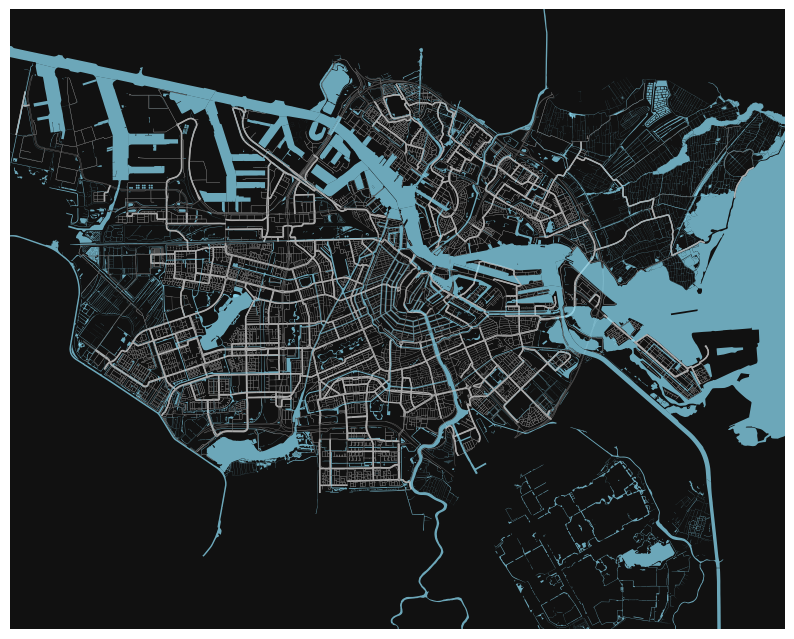

In [92]:
#Plot roads network
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor("#111111")

north = 52.44313639111449
south = 52.28750244038128
east =  4.730099728719584
west = 5.048826591003738


ox.plot_graph(roads, ax=ax, node_size=0, edge_color=roadcols, edge_linewidth=roadwidth, bbox = (north, south,west,east),
              show=False, close=False)
ox.plot_footprints(water, ax=ax, color='#8cdbf3',alpha=0.75, bbox = (north, south,   west,east),
                   show=False, close=False)

plt.show()

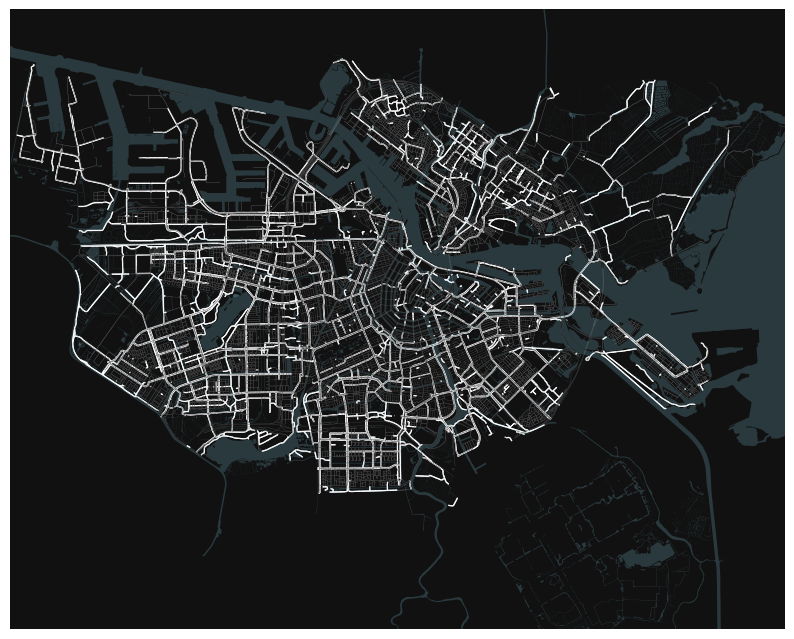

In [182]:
#Plot 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor("#111111")

north = 52.44313639111449
south = 52.28750244038128
east =  4.730099728719584
west = 5.048826591003738

ox.plot_graph(cycleways, ax=ax, node_size=0, edge_color="#FFFFFF", edge_linewidth=0.85, bbox = (north, south,west,east),
              show=False, close=False)
ox.plot_graph(roads, ax=ax, node_size=0, edge_color="#555555", edge_linewidth=0.2, bbox = (north, south,west,east),
              show=False, close=False)
ox.plot_footprints(water, ax=ax, color='#8cdbf3',alpha=0.2, bbox = (north, south,   west,east),
                   show=False, close=False)

plt.show()

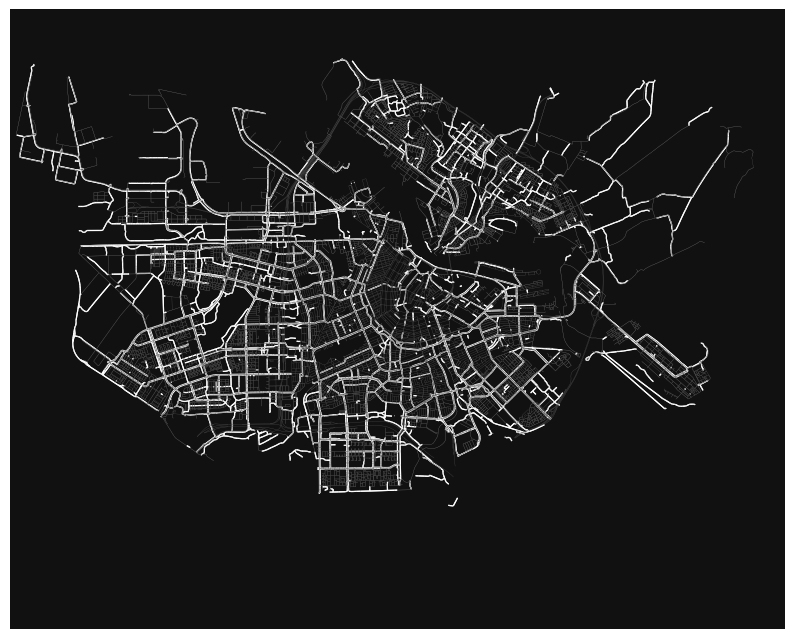

In [183]:
#Plot 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor("#111111")

north = 52.44313639111449
south = 52.28750244038128
east =  4.730099728719584
west = 5.048826591003738

ox.plot_graph(cycleways, ax=ax, node_size=0, edge_color="#FFFFFF", edge_linewidth=0.85, bbox = (north, south,west,east),
              show=False, close=False)
ox.plot_graph(roads, ax=ax, node_size=0, edge_color="#555555", edge_linewidth=0.2, bbox = (north, south,west,east),
              show=False, close=False)

plt.show()

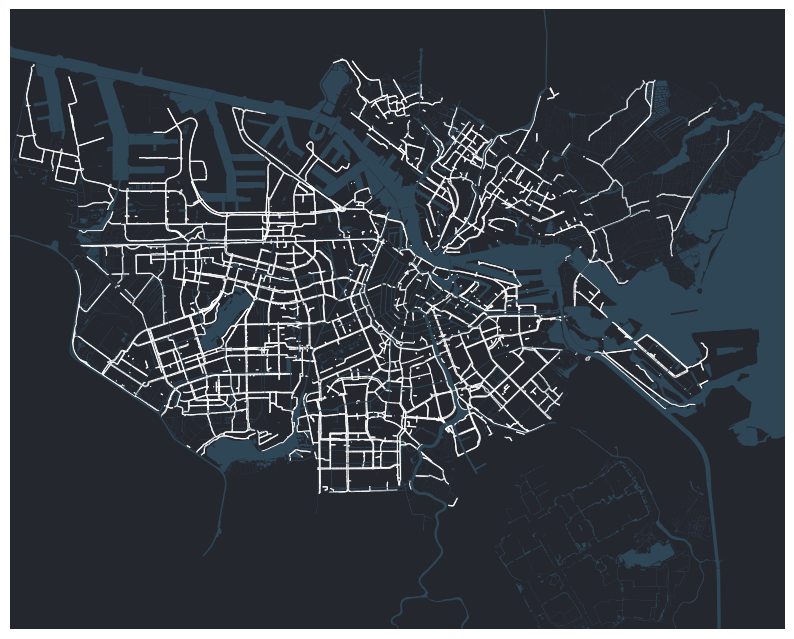

In [200]:
#Plot 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor("#25272F")

north = 52.44313639111449
south = 52.28750244038128
east =  4.730099728719584
west = 5.048826591003738

ox.plot_graph(cycleways, ax=ax, node_size=0, edge_color="#FFFFFF", edge_linewidth=0.85, bbox = (north, south,west,east),
              show=False, close=False)
ox.plot_footprints(water, ax=ax, color='#2e4656',alpha=1, bbox = (north, south,   west,east),
                   show=False, close=False)

plt.show()